## ANALYSE UNIE AVARIER

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
plt.style.use('ggplot')

# ?pd.pivot_table

In [168]:
tips_df = sns.load_dataset('tips')

In [169]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [170]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


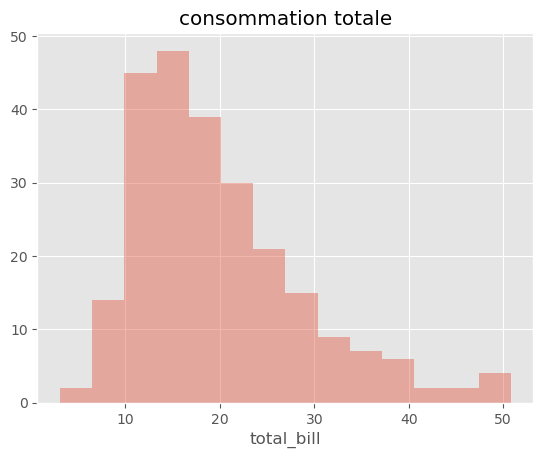

In [171]:
# Histgramme du montant total de consommation

sns.distplot(tips_df['total_bill'],kde=False).set_title('consommation totale');

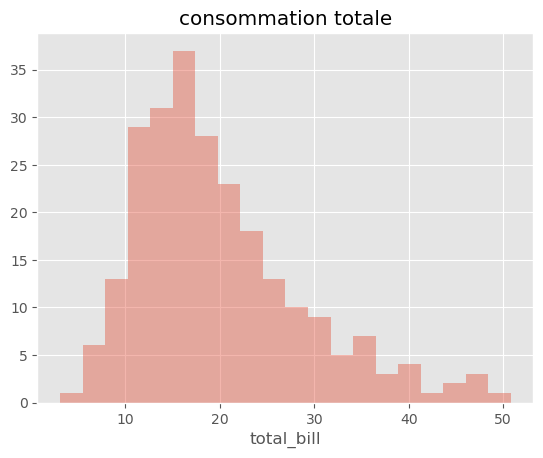

In [172]:
# Histgramme du montant total de consommation

sns.distplot(tips_df['total_bill'],kde=False, bins=20).set_title('consommation totale');

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


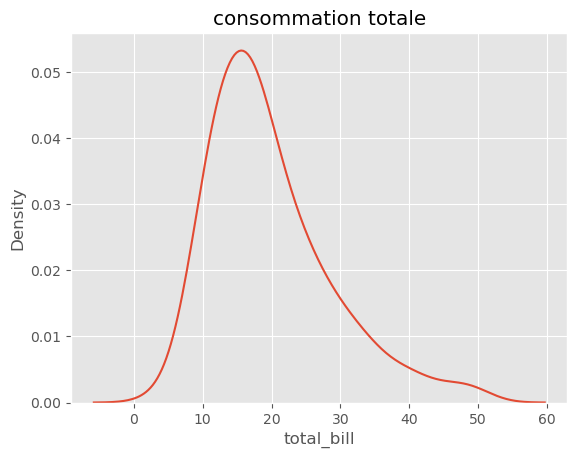

In [173]:
# La Densité de probalité du montant total de la consommation

sns.distplot(tips_df['total_bill'],hist=False, bins=20).set_title('consommation totale');

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


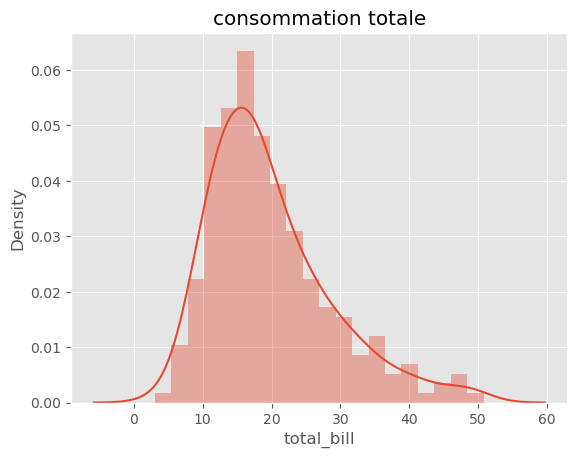

In [174]:
# La Densité de probalité et l'Histogramme du montant total de la consommation ensemble

sns.distplot(tips_df['total_bill'],kde=True, bins=20).set_title('consommation totale');

# sns.distplot(tips_df['total_bill']).set_title('consommation totale');par defaut cette ligne de code donne le meme resultat

# La distribution de la consommation totale de ce restaurant est unimodale et asymetrie vers la droite. centré a 
# environ 15$ avec la plus part des données qui se retrouvent entre 2$ et 50$ et nous avons des valeurs abérantes à 
# cause de l'étalement vers la droite

La distribution de la consommation totale de ce restaurant est unimodale et asymetrie vers la droite. centré a environ 15$ avec la plus part des données qui se retrouvent entre 2 dolar et 50 dolar et nous avons des valeurs abérantes à cause de l'etalement vers la droite

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


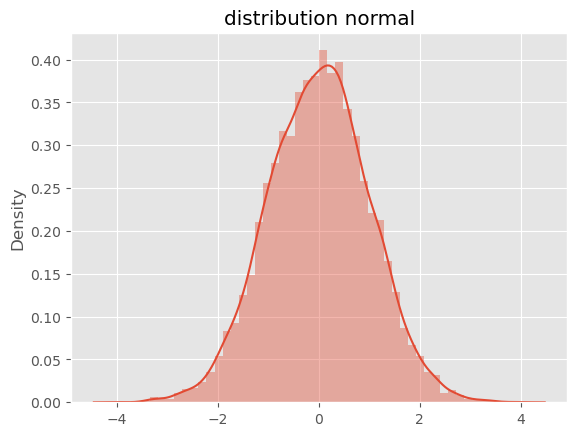

In [175]:
'''
description d'un Histogramme : 4 aspects importants 
1- "La forme" c'est a dire son apparence :
si l'histogramme est Symetrique comme une cloche, la loi de gausse ou la loi normale; Asymetrie positive vers la droite
c'est à dire étalé vers la droite; Asymetrie négative vers la gauche c'est à dire étalé vers la gauche.
2- "Le centre de la distribution" pour specifier la mediane. si c'est une loi normal la mediane est confondu a la moyenne ou
une distribution parfaitemnet symetrique.
3- "La dispersion des valeurs", interprèter à traver les parametres statistiques comme la variance, covariance, quartille...
4- "Les valeurs aberantes ou outliers", ce sont des valeurs qui sortent du lot. ce qui cause l'etalement des valeurs
'''
# Exemple de distribution normal

sns.distplot(np.random.normal(size=10000),kde=True).set_title('distribution normal');

In [176]:
# Importation du module scipy

# importation du module stats de scipy
from scipy import stats
# Fonction pour determiner les outliers
# Valeur < Q1 - 1.5IQR ou Valeur > Q3 + 1.5IQR alors on a les outliers
def finding_outliers(data, variable_name):
    '''
    data = data frame pandas
    variable_name= nom de la variable (chaine de caractere)
    '''
    # Calcul de l'IQR Q1 et Q3
    iqr = stats.iqr(data[variable_name])
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    # Calcul de limite de Q1 - 1.5IQR et Q3 + 1.5IQR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Dataframe des valeurs aberantes 
    outliers_df = data[(data[variable_name]<lower) | (data[variable_name]>upper)]
    return outliers_df

In [177]:
# Point de données aberants de la viariable indiquant les pourboires

finding_outliers(data = tips_df, variable_name = 'tip')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


## Boite à moustache

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'montant des pourboires')

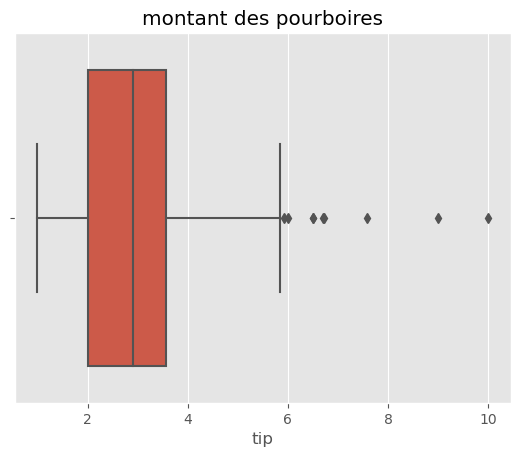

In [178]:
# Boite à moustache du montant des pourboires

sns.boxplot(tips_df['tip']).set_title('montant des pourboires')

Text(0.5, 1.0, 'montant des pourboires')

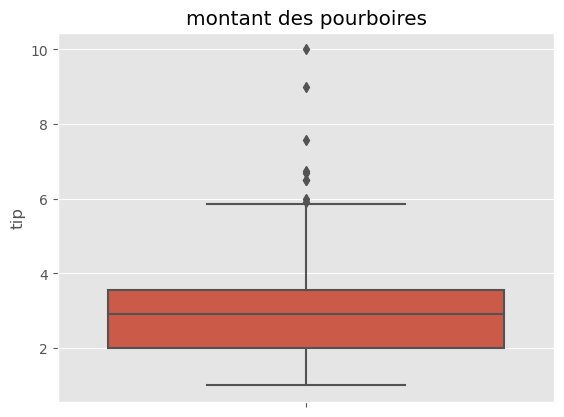

In [179]:
# Y= permet de mettre la boite à moustache en vertical

sns.boxplot(y= tips_df['tip']).set_title('montant des pourboires')

## Diagramme à barre et circulaire

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequentation du restaurant')

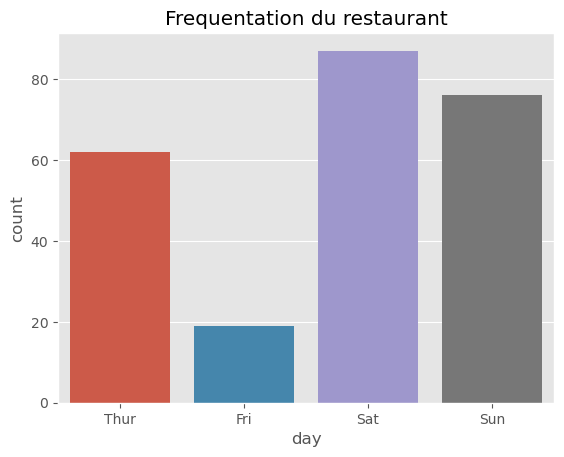

In [180]:
# Diagramme a barre de la variable "day"

sns.countplot(tips_df['day']).set_title('Frequentation du restaurant')

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequentation du restaurant')

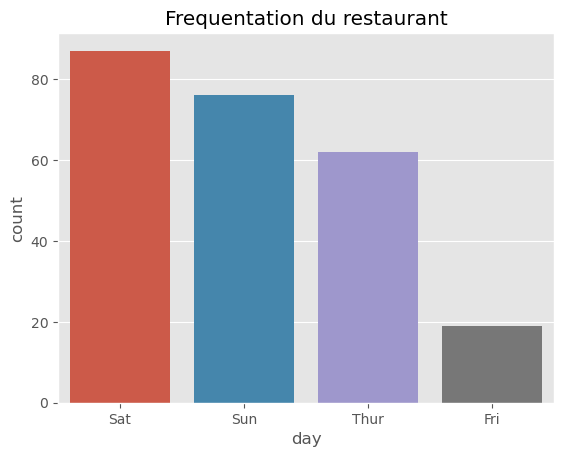

In [181]:
# Diagramme a barre afficher dans l'ordre décroissant du plus grand au plus petit

sns.countplot(tips_df['day'], order=tips_df['day'].value_counts().index)
plt.title('Frequentation du restaurant')   

C:\Users\Infogene\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequentation du restaurant')

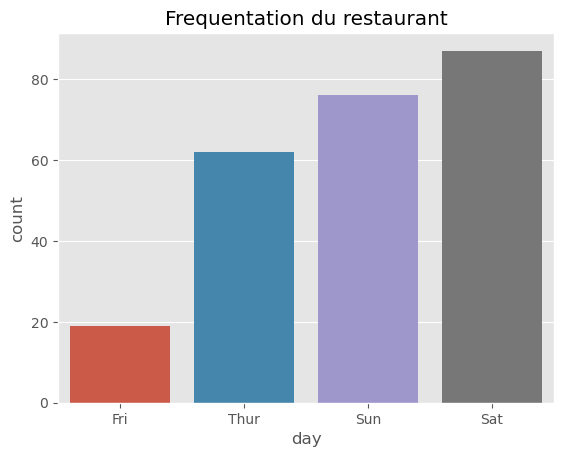

In [182]:
# Diagramme a barre afficher dans l'ordre croissant du plus petit au plus grand. preciser l'argument (ascending=True)

sns.countplot(tips_df['day'], order=tips_df['day'].value_counts(ascending=True).index)
plt.title('Frequentation du restaurant')   

<AxesSubplot:title={'center':'service du restaurant'}, ylabel='time'>

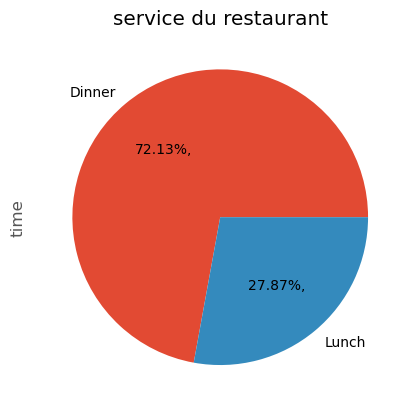

In [183]:
# Digramme en camamber ou Circulaire de la variable time.   pour afficher les porcentages (autopct='%.2f%%')

tips_df['time'].value_counts().plot(kind='pie',autopct='%.2f%%,', title='service du restaurant')

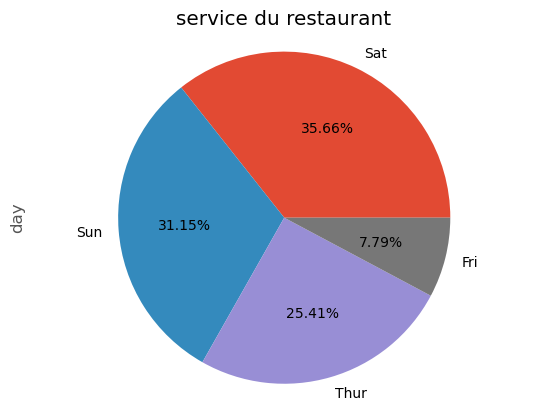

In [184]:
# Diagramme en secteur ou camamber ou Circulaire de la variable day. pour afficher les porcentages (autopct='%.2f%%') 

tips_df['day'].value_counts(normalize=True).plot(kind='pie',title='service du restaurant',autopct='%.2f%%')
plt.axis('equal')
plt.show()

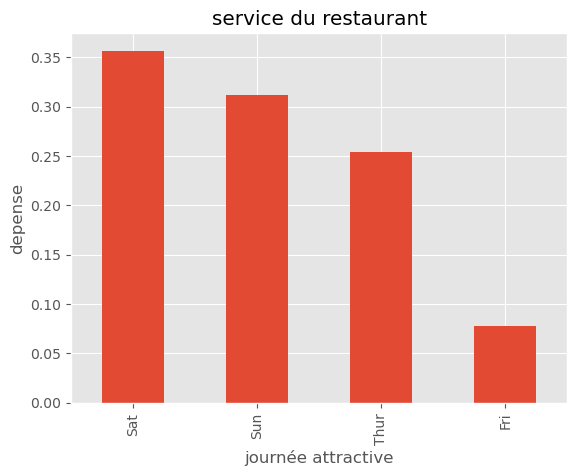

In [185]:
# Diagramme en tuyaux d'orgues ou barre 

tips_df['day'].value_counts(normalize=True).plot(kind='bar', title='service du restaurant')
plt.xlabel('journée attractive')
plt.ylabel('depense')
plt.show()